# 오늘은 4일차


## 3일차 복습

PCA를 통해서 차원축소를 하는데 과적합과 과소적합의 중간을 결정

train자체는 w,b를 조절하는 최적화를 통해서 train의 score를 optimize하고
train과 validation의 차이가 심하면 과적합이고 . 
모의고사 좀 풀고 수능을 잘한다고 확신한다는 느낌이라고 함 -> 샘플 수를 늘려서 일반화( 샘플수를 늘려서)


정확도.
learning_curve sample을 tunign해서 과적합 조정 
validation_curve로 hyper parameter를 tuning했고 마찬가지로 과적합 조정


GridSearch로 


Confusion Matrix로 다양한 지표를 통해 모델 검증 Roc Curve로 봄

1) 최적화

2) 일반화


In [129]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame


In [130]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

%matplotlib inline


##  오늘은 4일차

### 다층 퍼셉트론

In [131]:
def 로직게이트생성(w,b)  :
    def logic_gate(x1,x2) :
        x = np.array([x1,x2])
        z = np.sum(w*x) + b
        y = 1 if z > 0 else 0
        return y
    return logic_gate

In [132]:
def test(logic) :
    for x1, x2 in [(0, 0), (0, 1), (1, 0), (1, 1)]:
        y = logic(x1, x2)
        print(x1, x2, '|', y)

In [133]:
AND = 로직게이트생성(np.array([0.5, 0.5]), -0.7)

In [134]:
test(AND)

0 0 | 0
0 1 | 0
1 0 | 0
1 1 | 1


In [135]:
NAND = 로직게이트생성(np.array([-0.5, -0.5]), 0.7)

In [136]:
test(NAND)

0 0 | 1
0 1 | 1
1 0 | 1
1 1 | 0


In [137]:
OR = 로직게이트생성(np.array([0.5, 0.5]), -0.2)

In [138]:
test(OR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 1


다층 퍼셉트론으로 XOR해결하기

In [139]:
def XOR(x1,x2) :
    s1 = NAND(x1,x2)
    s2 = OR(x1,x2)
    y = AND(s1,s2)
    return y

In [140]:
test(XOR)

0 0 | 0
0 1 | 1
1 0 | 1
1 1 | 0


## 인공 신경망

In [141]:
def step(x) :
    y = np.where(x>0,1,-1)
    return y.astype(np.int)

In [142]:
x = np.arange(-5.,5.,0.1)

In [143]:
y = step(x)

In [144]:
y

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
       -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1])

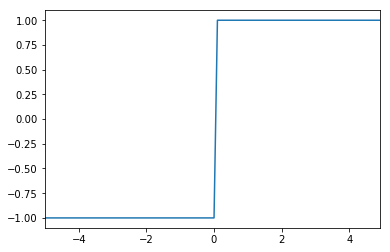

In [145]:
Series(y, index=x).plot()

In [146]:
def sigmoid(x) :
    return 1 / (1+np.exp(-x))

In [147]:
y = sigmoid(x)

In [148]:
y

array([ 0.00669285,  0.00739154,  0.00816257,  0.0090133 ,  0.0099518 ,
        0.01098694,  0.01212843,  0.01338692,  0.01477403,  0.0163025 ,
        0.01798621,  0.01984031,  0.02188127,  0.02412702,  0.02659699,
        0.02931223,  0.03229546,  0.03557119,  0.03916572,  0.04310725,
        0.04742587,  0.05215356,  0.05732418,  0.06297336,  0.06913842,
        0.07585818,  0.0831727 ,  0.09112296,  0.09975049,  0.10909682,
        0.11920292,  0.13010847,  0.14185106,  0.15446527,  0.16798161,
        0.18242552,  0.19781611,  0.21416502,  0.23147522,  0.24973989,
        0.26894142,  0.2890505 ,  0.31002552,  0.33181223,  0.35434369,
        0.37754067,  0.40131234,  0.42555748,  0.450166  ,  0.47502081,
        0.5       ,  0.52497919,  0.549834  ,  0.57444252,  0.59868766,
        0.62245933,  0.64565631,  0.66818777,  0.68997448,  0.7109495 ,
        0.73105858,  0.75026011,  0.76852478,  0.78583498,  0.80218389,
        0.81757448,  0.83201839,  0.84553473,  0.85814894,  0.86

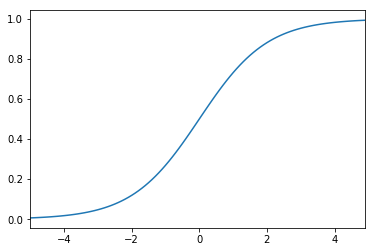

In [149]:
Series(y, index=x).plot()

In [150]:
def ReLU(x):
    return np.maximum(0, x)

In [151]:
y = ReLU(x)
y

array([ 0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,
        0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0. ,  0.1,  0.2,  0.3,  0.4,
        0.5,  0.6,  0.7,  0.8,  0.9,  1. ,  1.1,  1.2,  1.3,  1.4,  1.5,
        1.6,  1.7,  1.8,  1.9,  2. ,  2.1,  2.2,  2.3,  2.4,  2.5,  2.6,
        2.7,  2.8,  2.9,  3. ,  3.1,  3.2,  3.3,  3.4,  3.5,  3.6,  3.7,
        3.8,  3.9,  4. ,  4.1,  4.2,  4.3,  4.4,  4.5,  4.6,  4.7,  4.8,
        4.9])

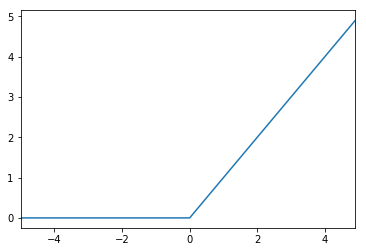

In [152]:
Series(y, index=x).plot()

## 신경망 순전파

In [153]:
x = np.array([1.0,0.5])

# 1층

In [154]:
W1 = np.array([[0.1,0.3,0.5],[0.2,0.4,0.6]])
b1 = np.array([0.1,0.2,0.3])

In [155]:
z1 = np.dot(x,W1)+b1

In [156]:
a1 = sigmoid(z1)

In [157]:
a1

array([ 0.57444252,  0.66818777,  0.75026011])

## 2층

In [158]:
W2 = np.array([[0.1,0.4], [0.2,0.5], [0.3,0.6]])
b2 = np.array([0.1,0.2])

In [159]:
z2 = np.dot(a1,W2) + b2

In [160]:
a2 = sigmoid(z2)

In [161]:
z2.shape

(2,)

In [162]:
a2.shape

(2,)

## 출력

In [163]:
W3 = np.array([0.1,0.3])
b3 = 0.1

In [164]:
z3 = np.dot(a2,W3) + b3

In [165]:
a3 = sigmoid(z3)

In [166]:
y = a3

In [167]:
y

0.59722796177405213

## 여기에서는 분류형으로 사용하였다. (회귀로 접근)

In [168]:
1 if y > 0.5 else 0

1

## 손실함수

In [169]:
def 평균제곱오차(y,y_pred) :
    return np.mean((y-y_pred)**2)

In [170]:
y = np.array([0,0,1,0,0,0,0,0,0,0])

In [171]:
len(y)

10

In [172]:
y_pred1 = np.array([0.1,0.05,0.6,0.0,0.05,0.1,0.0, 0.1,0.0,0.0])

In [173]:
len(y_pred1)

10

In [174]:
y_pred1.sum()

1.0

In [175]:
y_pred2 = np.array([
    0.1, 0.05, 0.1, 0.0, 0.05,
    0.1, 0.0, 0.6, 0.0, 0.0
])

In [176]:
len(y_pred2)

10

In [177]:
y_pred2.sum()

1.0

In [186]:
loss = 평균제곱오차

In [187]:
loss(y, y_pred1)

0.019500000000000007

In [188]:
loss(y, y_pred2)

0.11950000000000001

In [191]:
def cross_entropy_error(y,y_pred) :
    delta = 1e-7
    return -np.sum(y*np.log(y_pred+delta))

In [192]:
loss = cross_entropy_error

In [193]:
loss(y, y_pred1)

0.51082545709933802

In [194]:
loss(y, y_pred2)

2.3025840929945458

In [195]:
import tensorflow as tf

In [196]:
iris = pd.read_csv('../data/iris.data', header=None)

In [199]:
y = iris[4]
X = iris.iloc[:,0:4]

In [200]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3)

In [201]:
from sklearn.linear_model import LogisticRegression

In [202]:
model = LogisticRegression()

In [203]:
model.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [204]:
model.coef_

array([[ 0.38870874,  1.37549719, -2.08149935, -0.96033949],
       [ 0.44214868, -1.61466519,  0.61811179, -1.39711532],
       [-1.53026422, -1.08312912,  2.03766881,  2.24974372]])

In [205]:
model.score(X_test,y_test)

0.91111111111111109

In [206]:
import pickle

In [208]:
with open('model.pkl', 'wb') as file :
    pickle.dump(model,file)
    

In [209]:
del model

In [210]:
with open('model.pkl','rb') as file :
    model = pickle.load(file)
    

In [211]:
model.score(X_test,y_test)

0.91111111111111109

In [212]:
X_test.shape

(45, 4)

In [213]:
X_test.iloc[0]

0    6.6
1    3.0
2    4.4
3    1.4
Name: 75, dtype: float64

In [214]:
import predict
predict.__file__

'c:\\python-opensource-for-deep-learning\\notebook\\predict.py'

In [215]:
predict.__name__

'predict'

## Tensorflow

In [216]:
import tensorflow as tf

In [217]:
from tensorflow.examples.tutorials.mnist import input_data

In [218]:
mnist = input_data.read_data_sets('mnist/',one_hot=True)

Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Extracting mnist/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Extracting mnist/train-labels-idx1-ubyte.gz
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting mnist/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting mnist/t10k-labels-idx1-ubyte.gz


In [289]:
x = mnist.train.images[0]

In [290]:
type(x)

numpy.ndarray

In [291]:
x.shape

(784,)

In [292]:
x = np.reshape(x, (28,28))

In [293]:
x.shape

(28, 28)

In [294]:
from scipy.misc import imsave

In [295]:
imsave('mnist_sample.png',x)

신경망 모델 구성

In [296]:
x = tf.placeholder(tf.float32, [None, 28*28])

In [297]:
W = tf.Variable(tf.zeros([28*28, 10]))
b = tf.Variable(tf.zeros([10]))

# softmax는 다중분류의 출력값을 조정하는데 필수적입니다>

In [298]:
def softmax(a):
    c = np.max(a)
    ea = np.exp(a-c)
    return ea / np.sum(ea)

In [299]:
a = np.array([0.3,2.9,4.0])

In [300]:
a.sum()

7.1999999999999993

In [301]:
y = softmax(a)

In [302]:
y

array([ 0.01821127,  0.24519181,  0.73659691])

In [303]:
y.sum()

1.0

In [304]:
# 예측값 y 

In [305]:
y = tf.nn.softmax(tf.matmul(x,W)  + b)

정답 y

In [306]:
y_ = tf.placeholder(tf.float32, [None, 10])

손실함수


In [327]:
cross_entropy = tf.reduce_mean(
    -tf.reduce_sum(y_ * tf.log(y), reduction_indices=[1]))

경사하강법 (Gradient Descent)로 손실함수 최소화

In [328]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(cross_entropy)

계산그래프 실행

In [329]:
세션 = tf.InteractiveSession()


In [330]:

tf.global_variables_initializer().run()

1000번 실행

In [331]:
for _ in range(1000):
    batch_xs, batch_ys = mnist.train.next_batch(100)
    세션.run(train_step, feed_dict={x: batch_xs, y_: batch_ys})

모델 평가

In [332]:
y_pred = tf.equal(tf.argmax(y, 1), tf.argmax(y_, 1))

In [333]:
정확도 = tf.reduce_mean(tf.cast(y_pred, tf.float32))

In [334]:
print(세션.run(
    정확도, 
    feed_dict={x: mnist.test.images, y_: mnist.test.labels}))

0.9178


Keras

In [336]:
import keras

Using TensorFlow backend.


In [337]:
from keras.datasets import mnist

In [375]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [376]:
X_train.shape

(60000, 28, 28)

In [377]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

In [378]:
X_train = X_train.reshape(60000, 28*28)

In [379]:
X_test.shape

(10000, 28, 28)

In [380]:
X_test = X_test.reshape(10000,28*28)

In [381]:
X_test.shape

(10000, 784)

자료형이 중요하다고 함

모두 float32형태로 바꿔줘야 한다고 한다. 그런데 왜 float64를 안쓸까 공간효율?

In [382]:
X_train.dtype

dtype('uint8')

In [383]:
X_train = X_train.astype('float64')

In [384]:
X_test = X_test.astype('float64')

데이터 전처리

In [385]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [386]:
( X_train.max() , X_train.min() )

(255.0, 0.0)

In [387]:
X_train /= 255
X_test /= 255

In [388]:
X_train

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]])

In [389]:
y_train[:10]

array([5, 0, 4, 1, 9, 2, 1, 3, 1, 4], dtype=uint8)

One Hot Encoding

In [390]:
( X_train.max() , X_train.min() )

(1.0, 0.0)

In [391]:
from keras.utils import np_utils

In [393]:
y_train

array([5, 0, 4, ..., 5, 6, 8], dtype=uint8)

In [413]:
Y_train = np_utils.to_categorical(y_train)

In [414]:
Y_test = np_utils.to_categorical(y_test)

모델 만들기

In [415]:
from keras.models import Sequential

In [416]:
model = Sequential()

층 추가

In [417]:
from keras.layers.core import Dense, Activation

In [418]:
layer1 = Dense(10, input_shape=(28*28,))

In [419]:
model.add(layer1)

In [420]:
model.add(Activation('softmax'))

모델 컴파일

In [421]:
model.compile(loss='categorical_crossentropy', optimizer='sgd', metrics=['accuracy'])

훈련

딥러닝에선 cross validation을 할 경우는 조심해야 한다. 왜냐하면 트레이닝 시간이 오래 걸리기 때문에 
그리고 에폭과 배치사이즈는 [여기](http://www.crowdlab.co.kr/questions/351/%EB%8D%B0%EC%9D%B4%ED%84%B0%EC%85%8B%EC%97%90-%EA%B4%80%EB%A0%A8%EB%90%9C-%ED%95%99%EC%8A%B5%EA%B3%BC%EC%A0%95%EC%9D%98-batch-size%EB%82%98-epoch%EA%B0%99%EC%9D%80-%EC%88%98%EC%B9%98%EC%9D%98-%EC%A1%B0%EC%A0%88%EC%97%90%EB%8C%80%ED%95%9C-%EA%B2%B0%EA%B3%BC%EA%B0%80-%EC%96%B4%EB%96%A0%ED%95%9C%EC%A7%80-%EA%B6%81%EA%B8%88%ED%95%A9%EB%8B%88%EB%8B%A4;jsessionid=15C08782360F21E7516E6E6B842DA832)에서 설명을 잘해놨다. 

가중치 갱신을 하기전에 batch_size는 실제로 X에 샘플을 몇번을 돌려보고 할것인가
그리고 애폭은 전체 데이터를 몇번 돌려봤냐의 카운트

즉 max_iter * batch size / whole data count 하면 됨

예시
=======================
참조 : http://fbsight.com/t/epoch-batch/84691/2

가진 데이터셋에 총 10,000개의 샘플이 있을 때

몇개의 샘플을 가져와서 웨이트를 업데이트 시킬 것인가? = 배치사이즈
배치사이즈1일 경우 = SGD
- 1만개를 1개씩 쪼갬
- 1개 가져와서 포워드 한번 백워드 한번 후 업데이트 (iteration step)
- 그다음 하나 가져와서 포워드 한번 백워드 한번 후 업데이트 (iteration step)
반복...

배치사이즈 10일 경우
- 1만개의 데이터셋을 10개씩(배치) 쪼갬
- 하나의 배치에는 10개의 데이터가 존재
- 하나의 배치 가져와서 포워드 한번 백워드 한번 후 업데이트 (iteration step)
- 그다음 배치 가져와서 포워드 한번 백워드 한번 후 업데이트 (iteration step)

모든 배치를 다 돈다면?
모든 데이터셋에 대해 한번씩 다 돌아본게 됨으로 epoch 1회라고 함



In [422]:
history = model.fit(X_train, Y_train, batch_size=128, epochs=200, validation_split=0.2 )

Train on 48000 samples, validate on 12000 samples
Epoch 1/200
48000/48000 [==============================] - 1s 19us/step - loss: 1.3845 - acc: 0.6726 - val_loss: 0.8966 - val_acc: 0.8253
Epoch 2/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.7936 - acc: 0.8276 - val_loss: 0.6592 - val_acc: 0.8553
Epoch 3/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.6443 - acc: 0.8496 - val_loss: 0.5642 - val_acc: 0.8677
Epoch 4/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.5721 - acc: 0.8607 - val_loss: 0.5116 - val_acc: 0.8772
Epoch 5/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.5282 - acc: 0.8679 - val_loss: 0.4776 - val_acc: 0.8809
Epoch 6/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.4980 - acc: 0.8728 - val_loss: 0.4532 - val_acc: 0.8853
Epoch 7/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.4755 - acc: 0.8769 - val_loss: 0.4351 - 

48000/48000 [==============================] - 1s 13us/step - loss: 0.3148 - acc: 0.9128 - val_loss: 0.3028 - val_acc: 0.9157
Epoch 60/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.3141 - acc: 0.9130 - val_loss: 0.3023 - val_acc: 0.9158
Epoch 61/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.3134 - acc: 0.9130 - val_loss: 0.3018 - val_acc: 0.9159
Epoch 62/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.3127 - acc: 0.9133 - val_loss: 0.3013 - val_acc: 0.9160
Epoch 63/200
48000/48000 [==============================] - 1s 12us/step - loss: 0.3121 - acc: 0.9135 - val_loss: 0.3009 - val_acc: 0.9163
Epoch 64/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.3115 - acc: 0.9134 - val_loss: 0.3004 - val_acc: 0.9157
Epoch 65/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.3109 - acc: 0.9137 - val_loss: 0.2999 - val_acc: 0.9163
Epoch 66/200
48000/48000 [==============

Epoch 118/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2906 - acc: 0.9192 - val_loss: 0.2849 - val_acc: 0.9203
Epoch 119/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2903 - acc: 0.9194 - val_loss: 0.2848 - val_acc: 0.9207
Epoch 120/200
48000/48000 [==============================] - 1s 12us/step - loss: 0.2900 - acc: 0.9193 - val_loss: 0.2846 - val_acc: 0.9207
Epoch 121/200
48000/48000 [==============================] - 1s 12us/step - loss: 0.2898 - acc: 0.9192 - val_loss: 0.2844 - val_acc: 0.9212
Epoch 122/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2896 - acc: 0.9193 - val_loss: 0.2843 - val_acc: 0.9212
Epoch 123/200
48000/48000 [==============================] - 1s 12us/step - loss: 0.2893 - acc: 0.9197 - val_loss: 0.2842 - val_acc: 0.9212
Epoch 124/200
48000/48000 [==============================] - 1s 12us/step - loss: 0.2891 - acc: 0.9196 - val_loss: 0.2840 - val_acc: 0.9207
Epoch 125/200
48000/

48000/48000 [==============================] - 1s 13us/step - loss: 0.2795 - acc: 0.9219 - val_loss: 0.2777 - val_acc: 0.9222
Epoch 177/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2794 - acc: 0.9220 - val_loss: 0.2776 - val_acc: 0.9220
Epoch 178/200
48000/48000 [==============================] - 1s 12us/step - loss: 0.2792 - acc: 0.9219 - val_loss: 0.2775 - val_acc: 0.9219
Epoch 179/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2790 - acc: 0.9221 - val_loss: 0.2775 - val_acc: 0.9219
Epoch 180/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2789 - acc: 0.9221 - val_loss: 0.2774 - val_acc: 0.9227
Epoch 181/200
48000/48000 [==============================] - 1s 12us/step - loss: 0.2788 - acc: 0.9221 - val_loss: 0.2772 - val_acc: 0.9225
Epoch 182/200
48000/48000 [==============================] - 1s 13us/step - loss: 0.2787 - acc: 0.9224 - val_loss: 0.2772 - val_acc: 0.9226
Epoch 183/200
48000/48000 [=======

In [424]:
train_results = DataFrame(history.history)

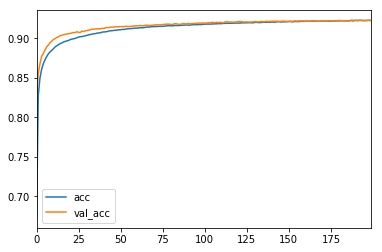

In [425]:
train_results[['acc','val_acc']].plot()

## 위의 결과
위의 결과를 보면 과소적합 과적합 둘다 안일어나고 빠르게 최적화/일반화가 이뤄진걸 볼 수 있따.

은닉층(Hidden Layer)

In [441]:
model = Sequential()

1층

In [442]:
model.add(Dense(128, input_shape=(28*28,), activation='relu'))

2층

In [443]:
model.add(Dense(128, activation='relu'))

In [444]:
model.add(Dense(128, activation='relu')) 

컴파일

In [445]:
model.add(Dense(10, activation='softmax'))

모델 컴파일

In [446]:
model.compile(
    loss='categorical_crossentropy', optimizer='sgd',
    metrics=['accuracy']
)

모델 훈련

In [447]:
history = model.fit(
    X_train, Y_train, batch_size=128, epochs=20,
    
)

Epoch 1/20
60000/60000 [==============================] - 2s 27us/step - loss: 1.3911 - acc: 0.6249
Epoch 2/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.4784 - acc: 0.8691
Epoch 3/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.3643 - acc: 0.8957
Epoch 4/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.3177 - acc: 0.9078
Epoch 5/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2883 - acc: 0.9156
Epoch 6/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2657 - acc: 0.9222
Epoch 7/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2475 - acc: 0.9275
Epoch 8/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2321 - acc: 0.9326
Epoch 9/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2185 - acc: 0.9368
Epoch 10/20
60000/60000 [==============================] - 1s 23us/step - loss: 0.2065 - acc: 0.9400

In [448]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 128)               100480    
_________________________________________________________________
dense_7 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_8 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_9 (Dense)              (None, 10)                1290      
Total params: 134,794
Trainable params: 134,794
Non-trainable params: 0
_________________________________________________________________
